In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Dehire\Plastic\cleaned_monthly_Plastic_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

quantity
date                
2019-12-01     10942
2020-01-01     11941
2020-02-01     12103
2020-03-01     12793
2020-04-01     12169
2020-05-01     12374
2020-06-01     12185
2020-07-01     12389
2020-08-01     12345
2020-09-01     12149
2020-10-01     12642
2020-11-01     12891
2020-12-01     11789
2021-01-01     12788
2021-02-01     12950
2021-03-01     13640
2021-04-01     13016
2021-05-01     13221
2021-06-01     13032
2021-07-01     13236
2021-08-01     13192
2021-09-01     12996
2021-10-01     13489
2021-11-01     13738
2021-12-01     12636
2022-01-01     13635
2022-02-01     13797
2022-03-01     14487
2022-04-01     13863
2022-05-01     14068
2022-06-01     13879
2022-07-01     14083
2022-08-01     14039
2022-09-01     13844
2022-10-01     14336
2022-11-01     14585

In [3]:
df = df.rename({'quantity': 'count'}, axis = 1)
df

count
date             
2019-12-01  10942
2020-01-01  11941
2020-02-01  12103
2020-03-01  12793
2020-04-01  12169
2020-05-01  12374
2020-06-01  12185
2020-07-01  12389
2020-08-01  12345
2020-09-01  12149
2020-10-01  12642
2020-11-01  12891
2020-12-01  11789
2021-01-01  12788
2021-02-01  12950
2021-03-01  13640
2021-04-01  13016
2021-05-01  13221
2021-06-01  13032
2021-07-01  13236
2021-08-01  13192
2021-09-01  12996
2021-10-01  13489
2021-11-01  13738
2021-12-01  12636
2022-01-01  13635
2022-02-01  13797
2022-03-01  14487
2022-04-01  13863
2022-05-01  14068
2022-06-01  13879
2022-07-01  14083
2022-08-01  14039
2022-09-01  13844
2022-10-01  14336
2022-11-01  14585

In [4]:
train=df.head(24)
test=df.tail(12)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [7]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [8]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [9]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.35729614 0.41523605 0.66201717 0.4388412  0.51216023
 0.44456366 0.51752504 0.50178827 0.43168813 0.60801144 0.69706724]
Predict this y: 
 [[0.30293276]]


In [10]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [12]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(generator,epochs=50)

Epoch 1/50
12/12 [==============================] - 2s 7ms/step - loss: 0.3124
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0517
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0351
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0243
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0244
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0216
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0180
Epoch 8/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0219
Epoch 9/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0195
Epoch 10/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0188
Epoch 11/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0205
Epoch 12/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0239
Epoch 13/50
12/12 [==============================

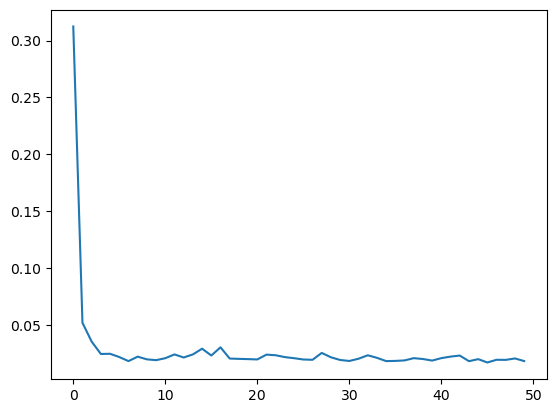

In [15]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [16]:
last_train_batch = scaled_train[-12:]

In [17]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [18]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 238ms/step


array([[0.98733264]], dtype=float32)

In [19]:
scaled_test[0]

array([0.60586552])

In [20]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [21]:
test_predictions

[array([0.98733264], dtype=float32),
 array([1.077561], dtype=float32),
 array([1.1359823], dtype=float32),
 array([1.1773769], dtype=float32),
 array([1.1968402], dtype=float32),
 array([1.2454458], dtype=float32),
 array([1.2970765], dtype=float32),
 array([1.3614497], dtype=float32),
 array([1.420457], dtype=float32),
 array([1.5068012], dtype=float32),
 array([1.6115955], dtype=float32),
 array([1.703161], dtype=float32)]

In [22]:
test.head()

count
date             
2021-12-01  12636
2022-01-01  13635
2022-02-01  13797
2022-03-01  14487
2022-04-01  13863

In [23]:
true_predictions = scaler.inverse_transform(test_predictions)

In [24]:
test['Predictions'] = true_predictions

C:\Users\hp\AppData\Local\Temp\ipykernel_6160\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='date'>

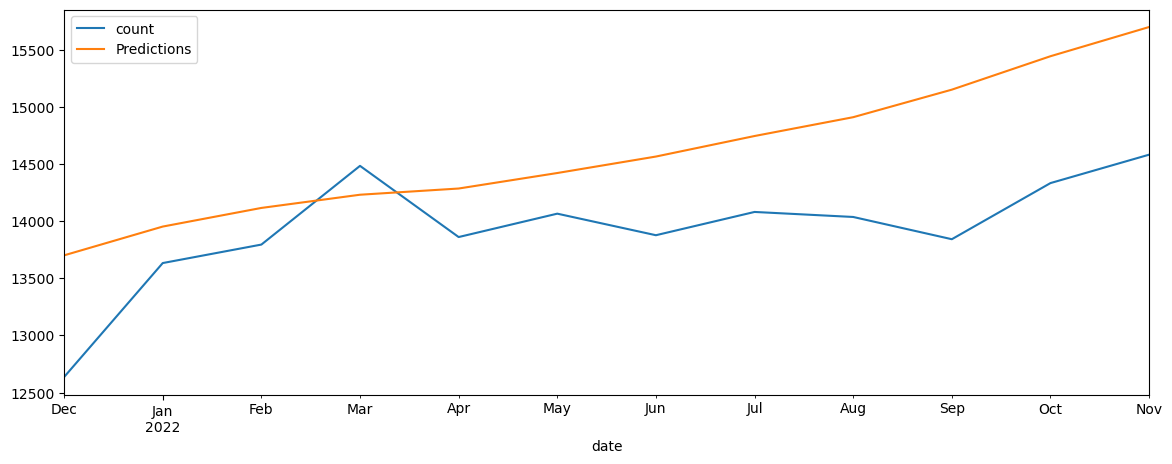

In [25]:
test.plot(figsize=(14,5))   

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['count'],test['Predictions']))
print(rmse)

796.1431345216322
